In [1]:
import pandas as pd
import numpy as np


# Replace 'your_file.csv' with the path to your CSV file
file_path = "02CNT02_morphology.csv"
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.replace(999, np.nan, inplace=True)
# Remove rows with NaN values
cleaned_df = df.dropna()
# Display the first few rows of the DataFrame

df.replace(999, np.nan, inplace=True)

# Remove rows with NaN values
cleaned_df = df.dropna()

# Filter rows where feature_type is 'SL'
slopes_df = cleaned_df[cleaned_df['feature_type'] == 'SL']


In [10]:
# Havermut Function
def dms_to_dd(degrees, minutes, seconds):
    return degrees + minutes / 60 + seconds / 3600

latitude_dms = (28, 56.1, 0)  # 29° 21.4' 0" N
longitude_dms = (95, 17.7,0)  # 94° 43.5' 0" W

# Convert DMS to Decimal Degrees
latitude_dd = dms_to_dd(*latitude_dms)
longitude_dd = -dms_to_dd(*longitude_dms)  # West is negative

#cleaned_df

import pandas as pd
import numpy as np


# Replace 999 (both as numbers and strings) with NaN
df.replace(['999', 999, 999.0], np.nan, inplace=True)

# Drop rows with NaN in critical columns (e.g., slope, feature_type)
critical_columns = [ 'feature_type']  # Add other important columns if needed
cleaned_df = df.dropna(subset=critical_columns)

# # Filter rows where feature_type is 'SL'
# slopes_df = cleaned_df[cleaned_df['feature_type'] == 'SL']

# # Display the filtered data
# print(slopes_df)



In [11]:
result_44_63 = df[(df['segment'] == 44) & (df['profile'] == 63)]
result_45_64 = df[(df['segment'] == 45) & (df['profile'] == 64)]
result_43_63 = df[(df['segment'] == 43) & (df['profile'] == 63)]


In [12]:
# Extract dune crest (DC) and dune toe (DT) rows
dune_crest = result_44_63 [result_44_63 ['feature_type'] == 'DC']
dune_toe =result_44_63 [result_44_63 ['feature_type'] == 'DT']

# Ensure only one row per type (if applicable)
if not dune_crest.empty and not dune_toe.empty:
    z_diff = dune_crest['z'].values[0] - dune_toe['z'].values[0]
    x_diff = dune_crest['x'].values[0] - dune_toe['x'].values[0]
    slope_dc_dt_44_63 = z_diff / x_diff if x_diff != 0 else None
else:
    slope_dc_dt_44_63 = None



In [5]:
# Extract dune crest (DC) and dune toe (DT) rows
dune_crest = result_45_64 [result_45_64 ['feature_type'] == 'DC']
dune_toe =result_45_64 [result_45_64 ['feature_type'] == 'DT']

# Ensure only one row per type (if applicable)
if not dune_crest.empty and not dune_toe.empty:
    z_diff = dune_crest['z'].values[0] - dune_toe['z'].values[0]
    x_diff = dune_crest['x'].values[0] - dune_toe['x'].values[0]
    slope_dc_dt_45_64 = z_diff / x_diff if x_diff != 0 else None
else:
    slope_dc_dt = None

slope_dc_dt_45_64

-0.09209411764705883

In [6]:
print(f'The slope of segment 44 of profile 63 are {slope_dc_dt_44_63} and segment of 45 and profile of 64 are {slope_dc_dt_45_64}')

The slope of segment 44 of profile 63 are -0.04667555555555555 and segment of 45 and profile of 64 are -0.09209411764705883


In [7]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming your DataFrame is called `cleaned_df`
# Step 1: Check if longitude (`lon`) and latitude (`lat`) columns are valid
print("Check for missing or invalid values in 'lon' and 'lat':")
print(cleaned_df[['lon', 'lat']].isnull().sum())

# Remove rows with missing longitude or latitude
cleaned_df = cleaned_df.dropna(subset=['lon', 'lat'])

# Step 2: Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(cleaned_df['lon'], cleaned_df['lat'])]
gdf = gpd.GeoDataFrame(cleaned_df, geometry=geometry)

# Step 3: Set the Coordinate Reference System (CRS)
# Assuming the data is in WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Step 5: Save to a file (optional)
gdf.to_file("cleaned_data.gpkg", driver="GPKG")  # Save as a GeoPackage


Check for missing or invalid values in 'lon' and 'lat':
lon    21206
lat    21206
dtype: int64


In [8]:
cleaned_df['distance'] = np.sqrt((cleaned_df['lat'] - latitude_dd)**2 + (cleaned_df['lon'] - longitude_dd)**2)

# Find the row with the minimum distance
closest_point = cleaned_df.loc[cleaned_df['distance'].idxmin()]


# Create a GeoDataFrame for the closest point
geometry = [Point(closest_point['lon'], closest_point['lat'])]
gdf = gpd.GeoDataFrame([closest_point], geometry=geometry)



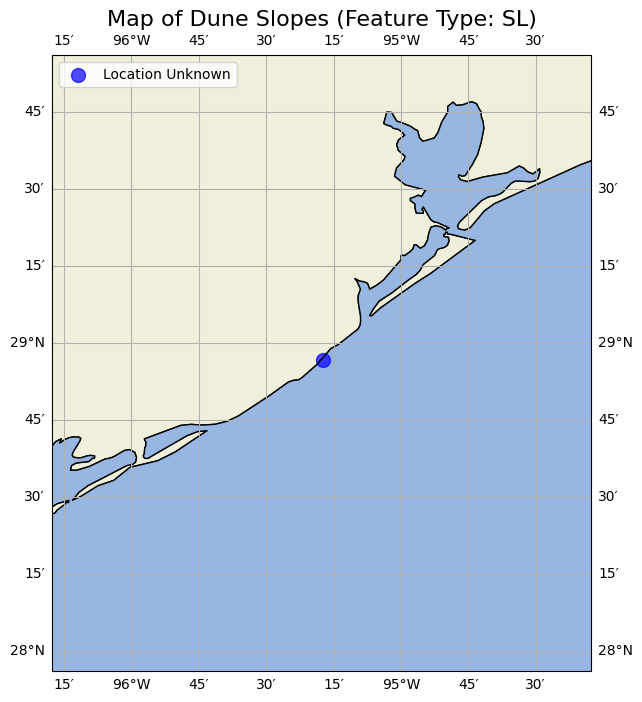

In [9]:
# 35 derajat 12.5 N
# 75 derajat 42.3 W

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Step 1: Load or prepare your GeoDataFrame
# Ensure `gdf` is already created with a valid CRS (e.g., EPSG:4326)

# Example GeoDataFrame creation if it's not already available (make sure `gdf` is created beforehand)
# For illustration purposes, let's assume `gdf` has a 'geometry' column with Point geometries
# and an appropriate CRS like EPSG:4326 (WGS84).

# gdf = gpd.read_file("your_shapefile.shp")  # If reading from a shapefile

# Step 2: Ensure that gdf has a valid CRS, and if not, set it to EPSG:4326 (WGS84)
if gdf.crs is None:
    gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)  # Set CRS if not defined

# Step 3: Set up the map with Cartopy
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add features to the map (land, ocean, coastlines, borders)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Step 2: Limit the x and y axis to zoom into the area of interest
ax.set_xlim(longitude_dd - 1, longitude_dd + 1)  # Adjust longitude range
ax.set_ylim(latitude_dd - 1, latitude_dd + 1)     # Adjust latitude range

# ax.set_xlim(Point(closest_point['lon']) - 1, Point(closest_point['lon']) + 1)  
# ax.set_ylim(Point(closest_point['lat']) - 1, Point(closest_point['lat']) + 1)  

# Step 4: Plot the GeoDataFrame on the Cartopy map
# Make sure the GeoDataFrame is in the same CRS as the map (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)  # Reproject to the same CRS as the map

gdf.plot(ax=ax, color='blue', markersize=100, alpha=0.7, label='Location Unknown', marker='o')

# Step 5: Enhance the map
ax.set_title("Map of Dune Slopes (Feature Type: SL)", fontsize=16)
plt.legend(loc='upper left')

# Step 6: Show the map
plt.show()
